In [500]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.optimize import minimize 
from sklearn.cluster import KMeans
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection


%matplotlib inline

In [499]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    
def threshold_brightness(img):
    img_ = np.copy(img)
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    img_ = cv2.GaussianBlur(img_,(5,5),0)
    
    ret,img_ = cv2.threshold(img_,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    return img_

def morph_transform(img, kernel_size=5):
    img_ = np.copy(img)
    # morphology transform
    kernel = np.ones((kernel_size, kernel_size),np.uint8)
    img_ = cv2.dilate(img_,kernel,iterations = 1)
    #img_ = cv2.erode(img_,kernel,iterations = 1)
    
    return img_

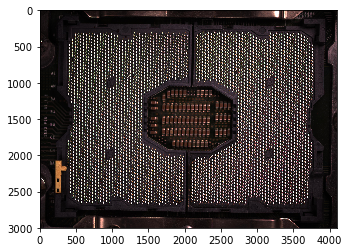

In [501]:
img = plt.imread('./detect_pin/4.jpg')
img_origin = np.copy(img)
plt.imshow(img)

In [502]:
img.shape, img.max()

((3000, 4096, 3), 255)

(3000, 4096)


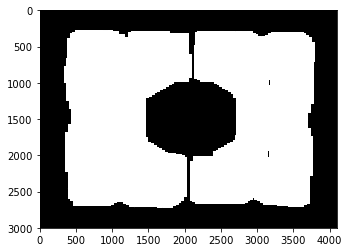

In [4]:
img_mask = cv2.imread('./detect_pin/Mask_for_Nanning/4.jpg',0)
# img_mask = cv2.imread('./GUI/mask.jpg',0)
print(img_mask.shape)
plt.imshow(img_mask,'gray')

In [5]:
img_rgb = cv2.bitwise_and(img, img, mask=img_mask)

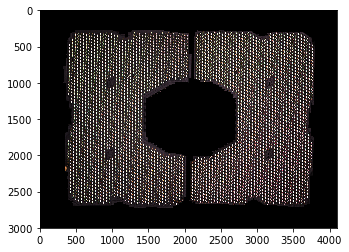

In [6]:
plt.imshow(img_rgb)

In [7]:
# img_bad = cv2.imread('./sample_bad.jpg')
# plt.imshow(img_bad)

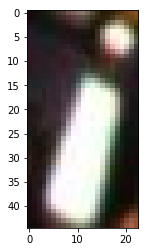

In [8]:
img_tmpl = plt.imread('./detect_pin/template_pin.jpg')
plt.imshow(img_tmpl)

In [9]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

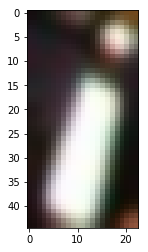

In [10]:
# Gaussian
img_blur = gaussian_blur(img_tmpl, kernel_size=5)
plt.imshow(img_blur, 'gray')

In [11]:
# loc_tmpl = [1000, 910]
# img_tmpl = img_bad[loc_tmpl[0]:loc_tmpl[0]+224, loc_tmpl[1]:loc_tmpl[1]+224]
# plt.imshow(img_tmpl)

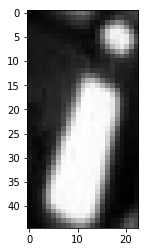

In [12]:
img_tmpl = cv2.cvtColor(img_tmpl, cv2.COLOR_BGR2GRAY)
plt.imshow(img_tmpl, 'gray')

In [13]:
img_tmpl.shape

(45, 23)

In [14]:
# img_rgb = cv2.imread('./detect_pin/1.jpg')

In [15]:
img_rgb.shape, img_rgb.max()

((3000, 4096, 3), 255)

In [16]:
# plt.show(cv2.bitwise_and(img_rgb, img_mask//255))

In [17]:
# img_rgb = img_rgb*(img_mask/255)
# img_rgb = img_rgb.astype('uint8')
# plt.imshow(img_rgb)

In [18]:
img_rgb.max()

255

In [19]:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# template = cv2.imread('template_patch.jpg', 0)
w, h = img_tmpl.shape[::-1]

res = cv2.matchTemplate(img_gray, img_tmpl, cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)

In [20]:
res.shape, img_rgb.shape, img_tmpl.shape

((2956, 4074), (3000, 4096, 3), (45, 23))

In [21]:
res.shape, loc[0].shape

((2956, 4074), (222616,))

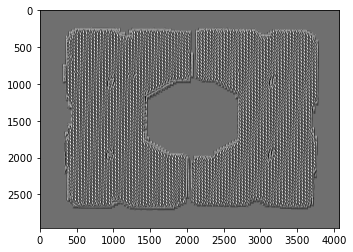

In [22]:
plt.imshow(res, 'gray')

In [23]:
canvas_blk = np.zeros_like(img_origin)

In [24]:
loc[0].shape

(222616,)

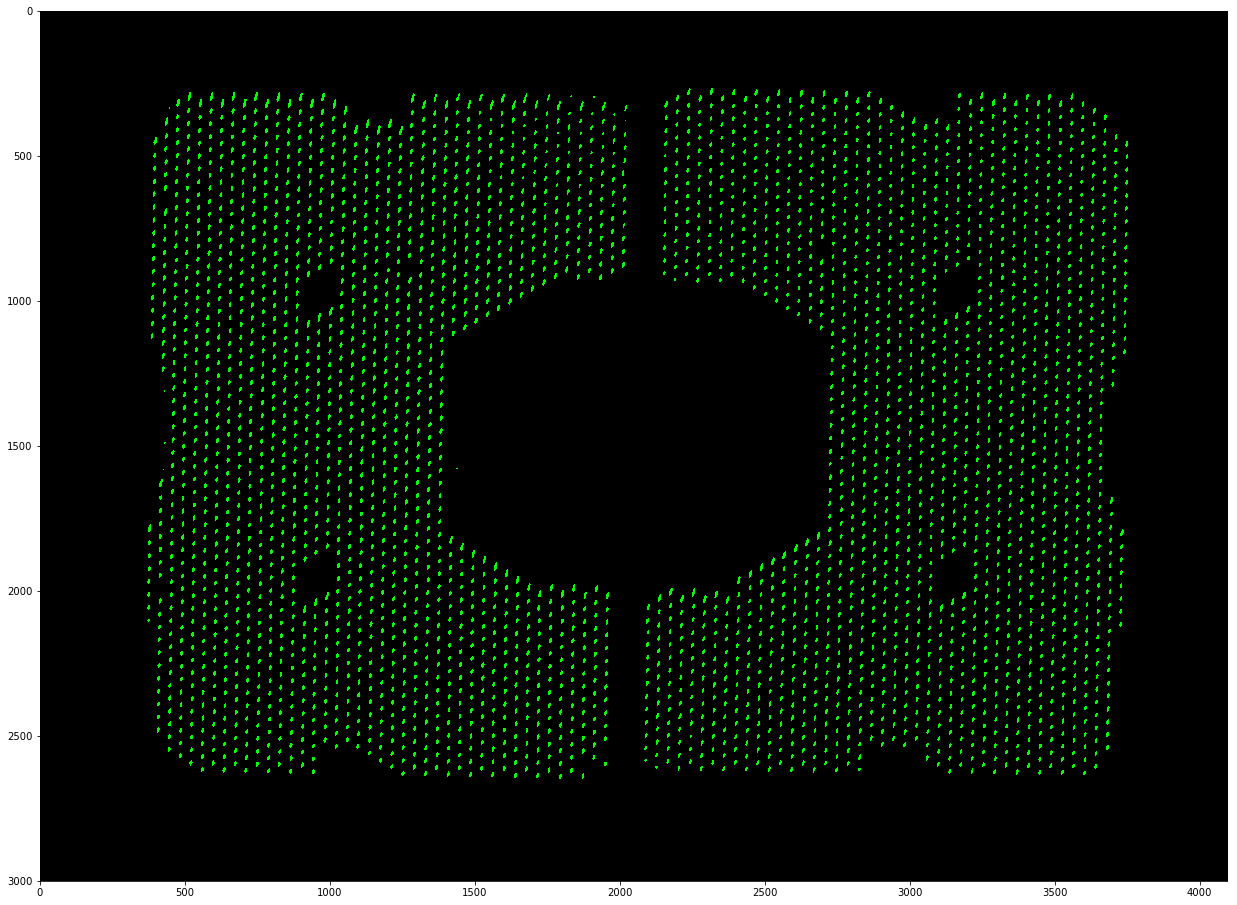

In [25]:
for pt in zip(*loc[::-1]):
#     cv2.rectangle(canvas_blk, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
    cv2.circle(canvas_blk, pt, 2, (0,255,0), 1)
#     cv2.arrowedLine(img_rgb, (pt[0], pt[1] + h), (pt[0] + w, pt[1]), (0,0,255), 1)

# cv2.imwrite('res.png',img_rgb)

plt.figure(figsize=(26, 16))
plt.imshow(canvas_blk)

In [26]:
cv2.imwrite('detection.jpg', canvas_blk)

True

## Blob detection

In [27]:
canvas_blk.shape

(3000, 4096, 3)

In [28]:
contours, h = cv2.findContours(canvas_blk[:,:,1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
h.shape

(1, 3644, 4)

In [30]:
len(contours)

3644

In [31]:
pin_centers = []
for contour in contours:
    pin_centers.append(contour.mean(0).astype(int))

In [32]:
pin_centers[0]

array([[1794, 2638]])

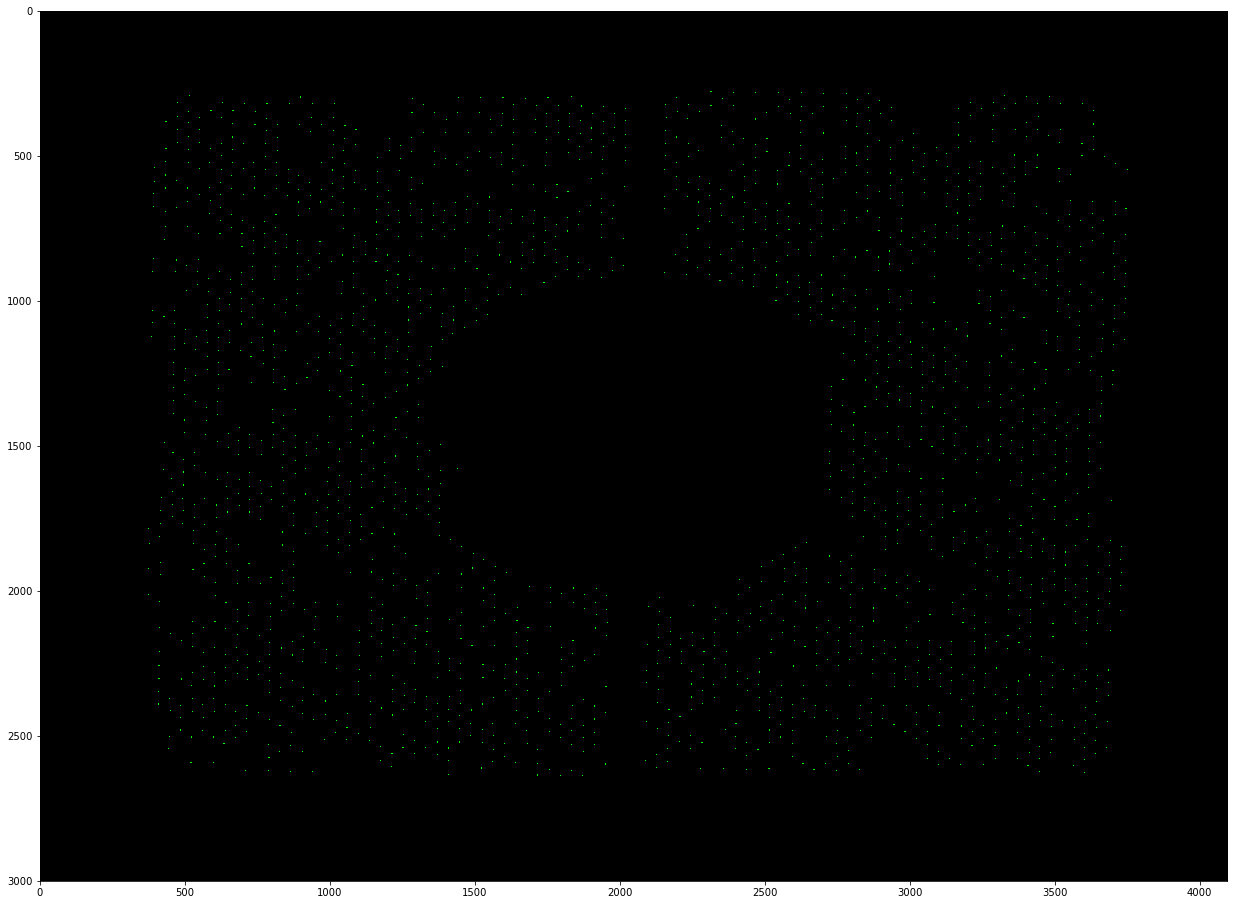

In [33]:
canvas_blk = np.zeros_like(img_origin)
for pin in pin_centers:
    cv2.circle(canvas_blk, (pin[0][0], pin[0][1]), 2, (0,255,0), 1)
    
plt.figure(figsize=(26, 16))
plt.imshow(canvas_blk)

In [34]:
cv2.imwrite('clean.jpg', canvas_blk)

True

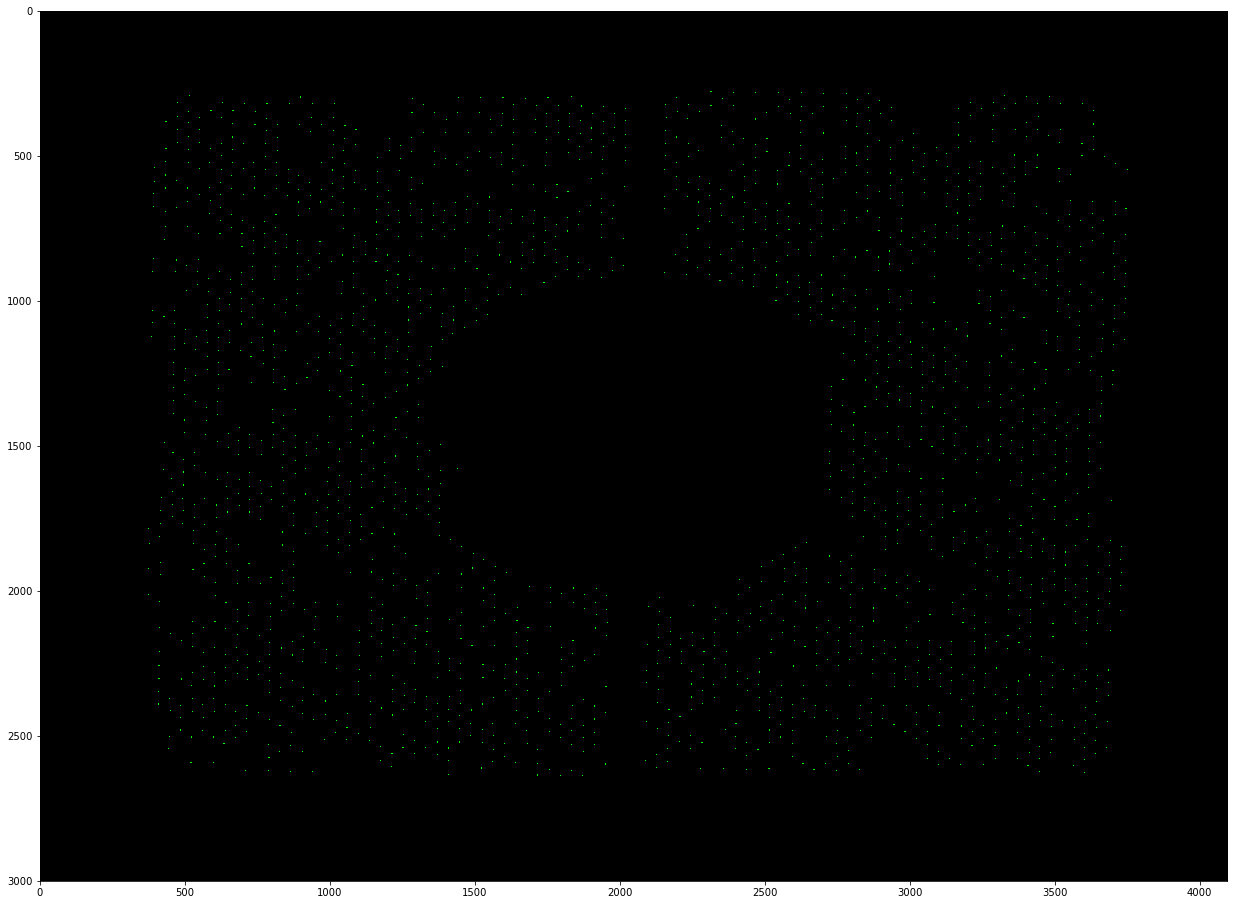

In [35]:
canvas_blk = np.zeros_like(img_origin)
pins_pos = []
for contour in contours:
    pin_pos = contour.mean(0).astype(int)
    pin_pos = np.squeeze(pin_pos)
    pins_pos.append(pin_pos)
    if len(contour) < 6:
        cv2.circle(canvas_blk, (pin_pos[0], pin_pos[1]), 5, (0,0,255), 1)
    else:
        cv2.circle(canvas_blk, (pin_pos[0], pin_pos[1]), 2, (0,255,0), 1)
    
plt.figure(figsize=(26, 16))
plt.imshow(canvas_blk)

In [36]:
cv2.imwrite('clean.jpg', canvas_blk)

True

## Point set

In [37]:
pins_pos = np.array(pins_pos)
pins_pos.shape

(3644, 2)

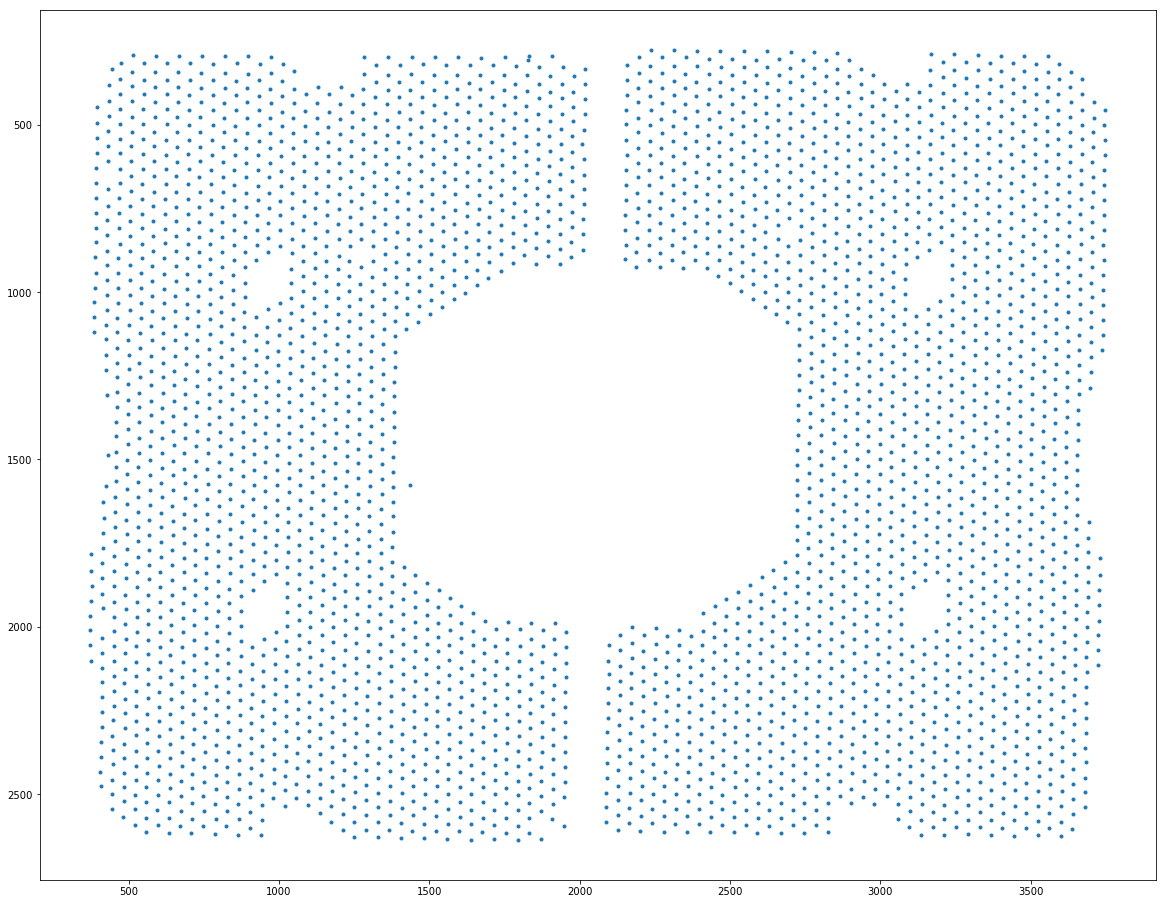

In [38]:
plt.figure(figsize=(20, 16))
plt.gca().invert_yaxis()
plt.plot(pins_pos[:,0], pins_pos[:,1], '.')

In [39]:
pt_center = pins_pos.mean(0)
pt_center

array([ 2054.34357849,  1454.6435236 ])

In [40]:
def cal_shadow(params, args):
    
    delta = params[0]  # Rotation angle
    pts = args[0]  # point set
    
    principal_axis = np.array([np.cos(delta*np.pi/180), np.sin(delta*np.pi/180)])
    
    pts_proj = np.dot(pts, principal_axis)
    
    return len(set(pts_proj.astype(int)))

In [41]:
def opti_delta(pts):
    delta = 0
    result = minimize(cal_shadow, [delta], args=[pts], method='COBYLA', tol=1e-6)
#     result
    delta_optimal = result.x[0]
    return delta_optimal

In [42]:
delta_optimal = opti_delta(pins_pos)
delta_optimal

0.8125

In [43]:
def draw_delta(pts, l=1000):
    pt_center = pts.mean(0)
    plt.figure(figsize=(16,12))
    plt.gca().invert_yaxis()
    plt.plot(pts[:,0], pts[:,1], '.')
    plt.plot(pt_center[0], pt_center[1], 'ro')
    plt.plot([pt_center[0], pt_center[0]+l*np.cos(delta_optimal/180*np.pi)], 
    [pt_center[1], pt_center[1]+l*np.sin(delta_optimal/180*np.pi)])

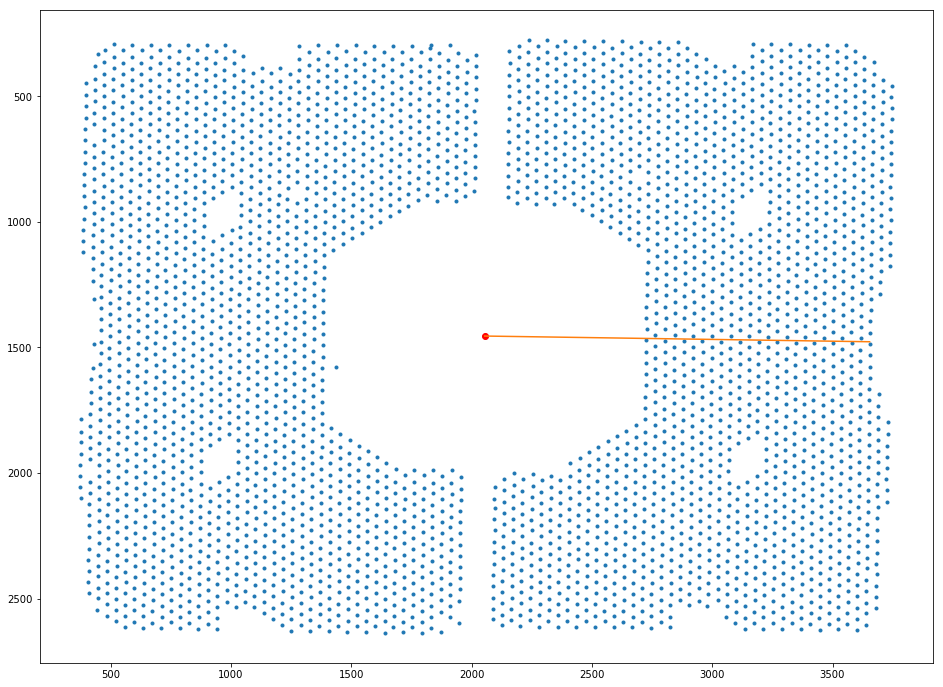

In [44]:
draw_delta(pins_pos, 1600)

In [51]:
def cal_paxis(delta):
    return np.array([np.cos(delta*np.pi/180), np.sin(delta*np.pi/180)])

In [52]:
# delta = 2.61  # degree
# principal_axis = np.array([np.cos(delta*np.pi/180), np.sin(delta*np.pi/180)])
principal_axis = cal_paxis(delta_optimal)
principal_axis

array([ 0.99989945,  0.01418032])

In [53]:
def proj_pts(pts, paxis):
    return np.dot(pts, paxis)

In [54]:
pts_proj = proj_pts(pins_pos, principal_axis)
pts_proj

array([ 1831.2273178 ,  1908.17703479,  1752.17853962, ...,  2393.73018636,
        2316.69538742,  2240.68884858])

In [55]:
def draw_proj(pts, pts_proj):
    

    plt.figure(figsize=(16,2))
    plt.plot(pts[:,0], [0]*pts[:,0], '.'); plt.show()
    plt.figure(figsize=(16,2))
    plt.plot(pts_proj, [0]*len(pts_proj), '.')

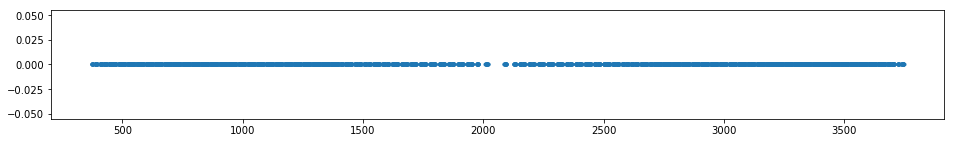

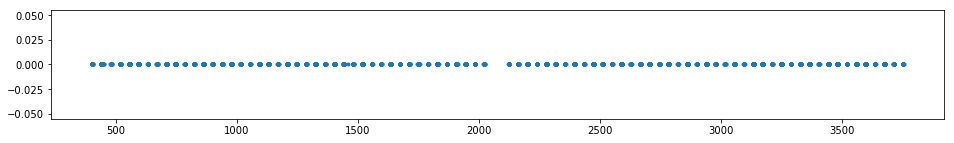

In [56]:
draw_proj(pins_pos, pts_proj)

## try row clustering

In [71]:
len(pts_proj)

3644

In [76]:
l_indices = np.where(pts_proj<2000)[0]
len(l_indices)

1809

In [77]:
delta_optimal_y = delta_optimal + 90
pts_proj_y = proj_pts(pins_pos[l_indices], cal_paxis(delta_optimal_y))
pts_proj_y

array([ 2612.29525715,  2608.20367377,  2609.415905  , ...,   285.60404783,
         284.52634314,   284.68195361])

In [78]:
def draw_proj(pts, pts_proj):
    

    plt.figure(figsize=(16,2))
    plt.plot(pts[:,1], [0]*pts[:,1], '.'); plt.show()
    plt.figure(figsize=(16,2))
    plt.plot(pts_proj, [0]*len(pts_proj), '.')

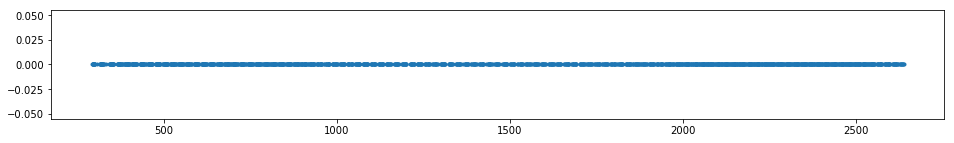

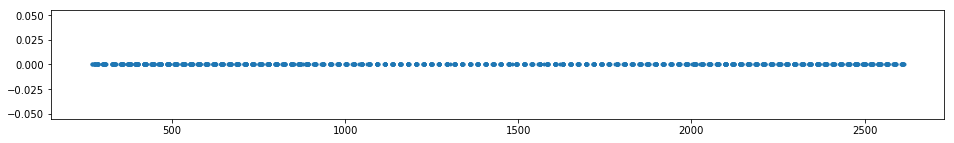

In [79]:
draw_proj(pins_pos[l_indices], pts_proj_y)

In [84]:
pts_projX = np.array([(pt, 0) for pt in pts_proj_y])
print(pts_projX.shape)

kmeans = KMeans(n_clusters=53*2, random_state=0).fit(pts_projX)
# kmeans.cluster_centers_

(1809, 2)


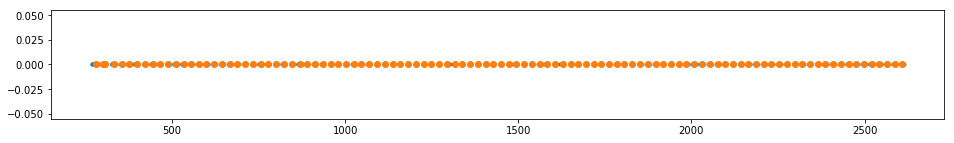

In [85]:
plt.figure(figsize=(16,2))
plt.plot(pts_proj_y, [0]*len(pts_proj_y), '.')
# plt.figure(figsize=(16,2))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'o');  plt.show()

## project to main paxis, column clustering

In [86]:
pts_projX = np.array([(pt, 0) for pt in pts_proj])
pts_projX.shape


# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=86, random_state=0).fit(pts_projX)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[ 3017.92730342,     0.        ],
       [ 1247.40914737,     0.        ],
       [  632.18652747,     0.        ],
       [ 2395.56090926,     0.        ],
       [ 3522.09395778,     0.        ],
       [ 1751.20086167,     0.        ],
       [  900.43000972,     0.        ],
       [ 2745.58436982,     0.        ],
       [ 3290.02674132,     0.        ],
       [ 1480.87182894,     0.        ],
       [ 3676.36300398,     0.        ],
       [ 2124.51127445,     0.        ],
       [  441.68183739,     0.        ],
       [ 2473.40436872,     0.        ],
       [ 1093.03810345,     0.        ],
       [ 1907.07743269,     0.        ],
       [ 2590.00189   ,     0.        ],
       [ 2901.87099925,     0.        ],
       [ 3212.45479114,     0.        ],
       [  746.10805275,     0.        ],
       [ 1364.4567963 ,     0.        ],
       [ 1635.40723507,     0.        ],
       [  593.39987515,     0.        ],
       [ 3406.27585716,     0.        ],
       [ 2240.71

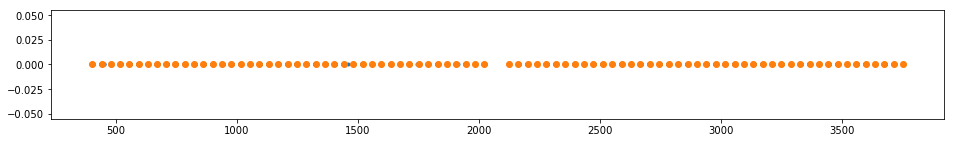

In [87]:
plt.figure(figsize=(16,2))
plt.plot(pts_proj, [0]*len(pts_proj), '.')
# plt.figure(figsize=(16,2))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'o');  plt.show()

In [88]:
kmeans.n_clusters

86

In [89]:
labels = kmeans.labels_
labels

array([35, 15,  5, ...,  3, 36, 24])

In [90]:
cluster_indices = np.argsort(kmeans.cluster_centers_[:,0])
cluster_indices

array([83, 12, 64, 34, 56, 22,  2, 61, 43, 19, 52, 29, 50,  6, 62, 25, 63,
       46, 14, 49, 30, 57,  1, 51, 39, 20, 53, 72,  9, 68, 74, 33, 21, 65,
       81,  5, 80, 35, 76, 15, 82, 32, 85, 11, 84, 75, 24, 79, 36, 78,  3,
       77, 13, 71, 67, 16, 73, 31, 70,  7, 58, 28, 44, 17, 40, 59,  0, 54,
       27, 66, 48, 18, 42,  8, 55, 37, 23, 60, 45,  4, 38, 47, 26, 10, 69,
       41], dtype=int64)

In [91]:
LABEL_COLOR_MAP = {idx: 'r' if i%3==0 else 'g' if i%3==1 else 'b' for i, idx in enumerate(cluster_indices)}
label_color = [LABEL_COLOR_MAP[l] for l in labels]

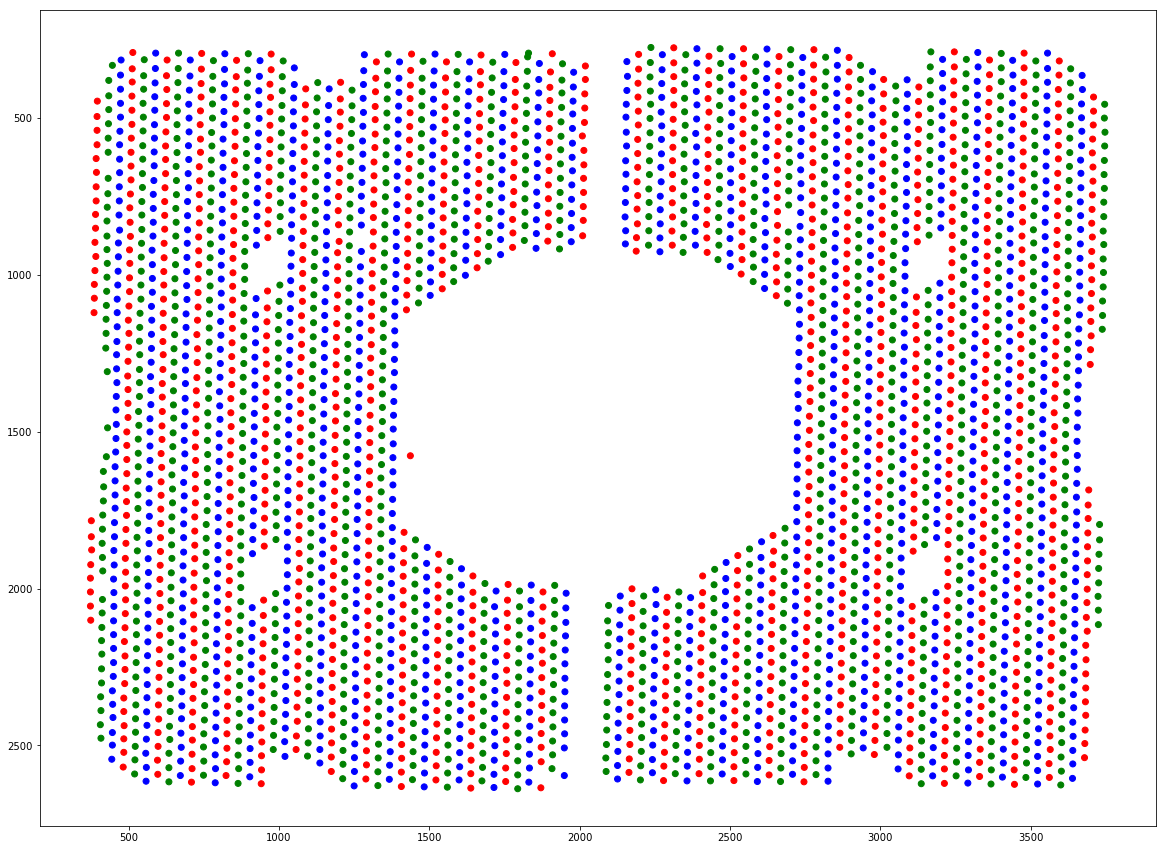

In [92]:
plt.figure(figsize=(20, 15))
plt.gca().invert_yaxis()
plt.scatter(pins_pos[:,0], pins_pos[:,1], c=label_color)
plt.savefig('cluster.svg')

In [93]:
pin_amount = []
for column_label in cluster_indices:
    pin_amount.append(len(np.where(labels==column_label)[0]))
    

In [94]:
pins_pos[np.where(labels==83)]

array([[ 374, 2101],
       [ 373, 2056],
       [ 373, 2011],
       [ 373, 1967],
       [ 374, 1924],
       [ 377, 1877],
       [ 376, 1835],
       [ 376, 1784],
       [ 385, 1121],
       [ 386, 1075],
       [ 386, 1031],
       [ 388,  987],
       [ 391,  942],
       [ 388,  897],
       [ 390,  852],
       [ 390,  808],
       [ 392,  765],
       [ 392,  720],
       [ 393,  674],
       [ 392,  630],
       [ 395,  586],
       [ 395,  540],
       [ 395,  496],
       [ 396,  447]])

In [99]:
indices = np.argsort(pins_pos[np.where(labels==83)][:,1])

In [100]:
pins_pos[np.where(labels==83)][indices]

array([[ 396,  447],
       [ 395,  496],
       [ 395,  540],
       [ 395,  586],
       [ 392,  630],
       [ 393,  674],
       [ 392,  720],
       [ 392,  765],
       [ 390,  808],
       [ 390,  852],
       [ 388,  897],
       [ 391,  942],
       [ 388,  987],
       [ 386, 1031],
       [ 386, 1075],
       [ 385, 1121],
       [ 376, 1784],
       [ 376, 1835],
       [ 377, 1877],
       [ 374, 1924],
       [ 373, 1967],
       [ 373, 2011],
       [ 373, 2056],
       [ 374, 2101]])

In [101]:
columns = []
for label in cluster_indices:
    pin_indices = np.argsort(pins_pos[np.where(labels==label)][:,1])
        
    columns.append(pins_pos[np.where(labels==label)][pin_indices])
columns

[array([[ 396,  447],
        [ 395,  496],
        [ 395,  540],
        [ 395,  586],
        [ 392,  630],
        [ 393,  674],
        [ 392,  720],
        [ 392,  765],
        [ 390,  808],
        [ 390,  852],
        [ 388,  897],
        [ 391,  942],
        [ 388,  987],
        [ 386, 1031],
        [ 386, 1075],
        [ 385, 1121],
        [ 376, 1784],
        [ 376, 1835],
        [ 377, 1877],
        [ 374, 1924],
        [ 373, 1967],
        [ 373, 2011],
        [ 373, 2056],
        [ 374, 2101]]), array([[ 446,  333],
        [ 434,  381],
        [ 434,  430],
        [ 434,  474],
        [ 433,  519],
        [ 432,  565],
        [ 432,  610],
        [ 432,  693],
        [ 431,  742],
        [ 429,  785],
        [ 428,  829],
        [ 428,  877],
        [ 428,  920],
        [ 429,  964],
        [ 428, 1008],
        [ 427, 1053],
        [ 426, 1098],
        [ 425, 1142],
        [ 425, 1187],
        [ 424, 1234],
        [ 429, 1309],
        [

In [102]:
test = columns[0]
np.linalg.norm(test[1:] - test[:-1], axis=1)

array([  49.01020302,   44.        ,   46.        ,   44.10215414,
         44.01136217,   46.01086828,   45.        ,   43.0464865 ,
         44.        ,   45.04442252,   45.09988914,   45.09988914,
         44.04543109,   44.        ,   46.01086828,  663.06108316,
         51.        ,   42.01190308,   47.09564736,   43.01162634,
         44.        ,   45.        ,   45.01110974])

In [103]:
column[seg_idx+1]

NameError: name 'column' is not defined

In [104]:
def cal_dist_pt2line(pt, a, b):
    return abs(a*pt[0]-pt[1]+b)/np.sqrt(a**2+1)

True

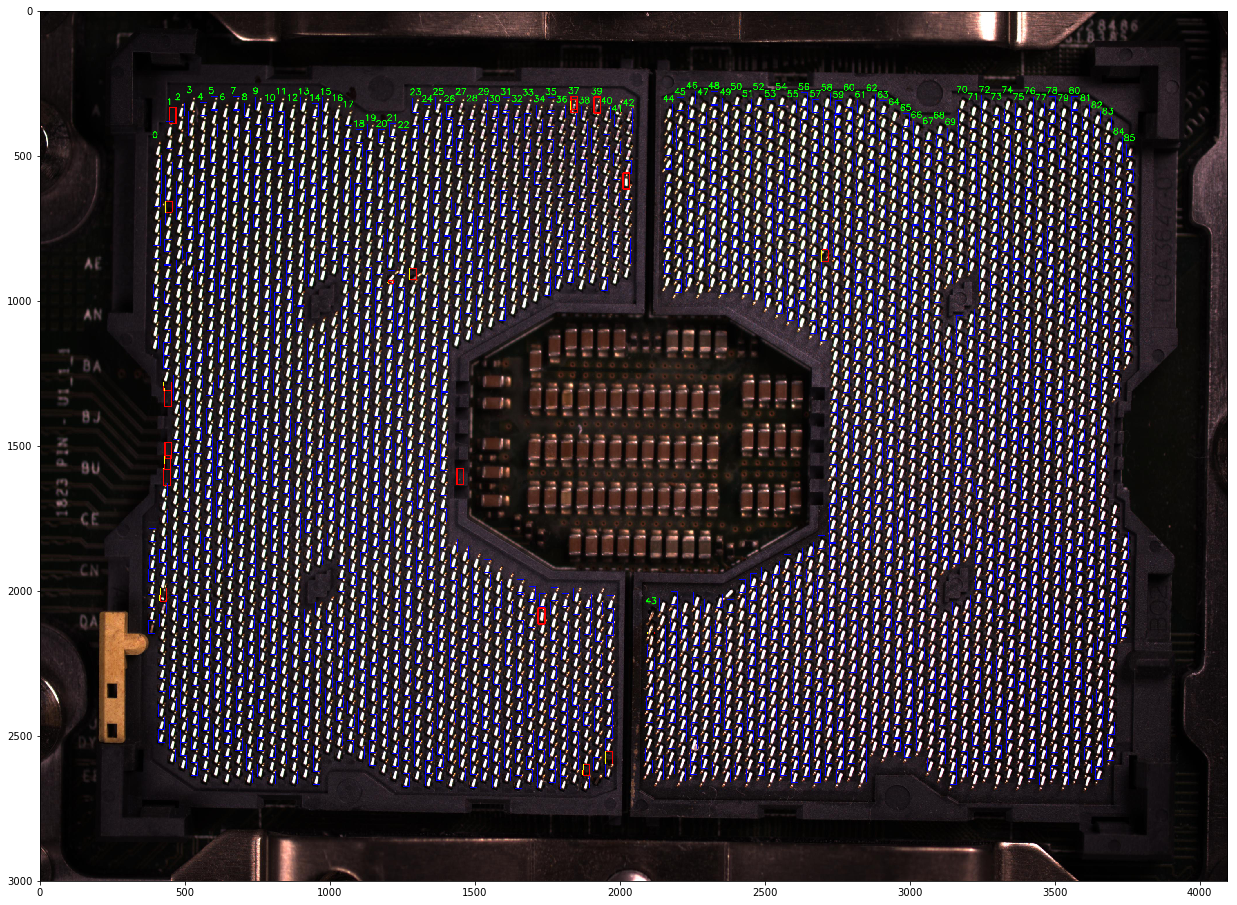

In [105]:
# canvas_blk = np.zeros_like(img_origin)
canvas_blk = np.copy(img_origin)
for col_idx, column in enumerate(columns):
    
    
    a, b = np.polyfit(column[:,0], column[:,1], 1)
    
        
    dist = np.linalg.norm(column[1:] - column[:-1], axis=1)
    segment_to_inspect = np.where((dist>60)&(dist<120)|(dist<40))[0]

    cv2.putText(canvas_blk, str(col_idx), (column[0][0]-10, column[0][1]-10), cv2.FONT_HERSHEY_SIMPLEX,  
                   1, (0, 255, 0), 2, cv2.LINE_AA)
    
    for i, pin in enumerate(column):
        dist = cal_dist_pt2line(pin, a, b)
        if dist > 4:
#             cv2.circle(canvas_blk, (int(pin[0]), int(pin[1])), 10, (255,0,0), 1, 1)
            cv2.rectangle(canvas_blk, (int(pin[0]), int(pin[1])), (int(pin[0]+23), int(pin[1]+55)), (255,0,0), 3)
        else:
            cv2.rectangle(canvas_blk, (int(pin[0]), int(pin[1])), (int(pin[0]+23), int(pin[1]+45)), (0,0,255), 1)
        
#             cv2.circle(canvas_blk, (int(pin[0]), int(pin[1])), 5, (0,255,0), -1, 1)

        
    if len(segment_to_inspect) > 0:
        for seg_idx in segment_to_inspect:
            
            cv2.rectangle(canvas_blk, (column[seg_idx][0], column[seg_idx][1]+45), 
                          (column[seg_idx+1][0]+23, column[seg_idx+1][1]), (255,0,0), 2)
            cv2.line(canvas_blk, (column[seg_idx][0], column[seg_idx][1]+45),
                     (column[seg_idx+1][0], column[seg_idx+1][1]), (255, 255, 0), 2)
            
            
    
            
plt.figure(figsize=(26, 16))
# plt.gca().invert_yaxis()
plt.imshow(canvas_blk)
canvas_blk = cv2.cvtColor(canvas_blk, cv2.COLOR_BGR2RGB)
cv2.imwrite('dist_anomaly.jpg', canvas_blk)

In [106]:
NPIN_DICT = {0: 24}

## row clustering

In [434]:
odd_indices = np.arange(1, 43, 2)
even_indices = np.arange(0, 43, 2)
odd_indices, even_indices

(array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42]))

In [435]:
odd_columns = np.array(columns)[odd_indices]
print(odd_columns.shape)

(21,)


In [436]:
odd_col_labels = []
for idx, col in zip(odd_indices, odd_columns):
    odd_col_labels.append([idx]*len(col))    

In [437]:
odd_col_labels = np.array([i for col in odd_col_labels for i in col])
odd_col_labels.shape

(915,)

In [438]:
odd_columns = np.concatenate(odd_columns, 0)
odd_columns.shape

(915, 2)

In [439]:
even_columns = np.array(columns)[even_indices]
print(even_columns.shape)

(22,)


In [440]:
even_col_labels = []
for idx, col in zip(even_indices, even_columns):
    even_col_labels.append([idx]*len(col))    

In [441]:
even_col_labels = np.array([i for col in even_col_labels for i in col])
even_col_labels.shape

(907,)

In [442]:
even_columns = np.concatenate(even_columns, 0)
even_columns.shape

(907, 2)

In [443]:
delta_optimal_y = delta_optimal + 90
pts_proj_y = proj_pts(even_columns, cal_paxis(delta_optimal_y))
pts_proj_y.shape

(907,)

In [444]:
pts_projY = np.array([(pt, 0) for pt in pts_proj_y])
print(pts_projY.shape)

kmeans = KMeans(n_clusters=52, random_state=0).fit(pts_projY)

(907, 2)


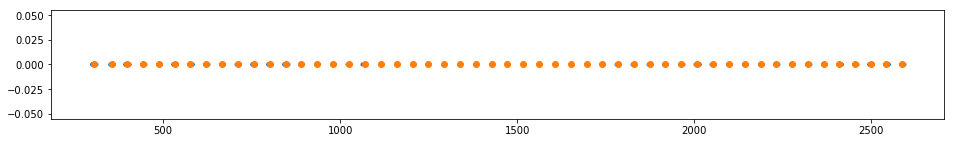

In [445]:
plt.figure(figsize=(16,2))
plt.plot(pts_proj_y, [0]*len(pts_proj_y), '.')
# plt.figure(figsize=(16,2))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'o');  plt.show()

In [446]:
cts = kmeans.cluster_centers_[:, 0]
cts

array([  666.62860114,  2008.21955752,  1337.82044523,  2453.92337713,
         979.87576584,   354.07213723,  1606.30734911,  2275.65584862,
         488.01117397,  1873.61600007,  1204.57689274,   800.19414537,
        2142.24515488,  2365.06316719,  2587.09479343,  1740.01021207,
        1472.06498796,   889.96962318,  1114.49412039,   621.8519963 ,
         532.66045273,   711.13379525,  2187.05128567,  2542.22230329,
         397.07852749,  1963.29278202,  2409.31439017,   443.28130822,
         755.731823  ,  2097.92208806,  1069.05617438,  2498.12389612,
         576.98320238,  1427.60137516,   303.21634212,  2052.49335751,
        2320.16200957,  2231.00466586,  1784.40444464,  1695.77080053,
         934.93048982,   845.55773253,  1248.660292  ,  1517.14828668,
        1918.36670318,  1024.39363802,  1829.05962959,  1159.18811423,
        1651.08080487,  1293.35465083,  1382.51262247,  1561.61189949])

In [447]:
np.sort(cts)

array([  303.21634212,   354.07213723,   397.07852749,   443.28130822,
         488.01117397,   532.66045273,   576.98320238,   621.8519963 ,
         666.62860114,   711.13379525,   755.731823  ,   800.19414537,
         845.55773253,   889.96962318,   934.93048982,   979.87576584,
        1024.39363802,  1069.05617438,  1114.49412039,  1159.18811423,
        1204.57689274,  1248.660292  ,  1293.35465083,  1337.82044523,
        1382.51262247,  1427.60137516,  1472.06498796,  1517.14828668,
        1561.61189949,  1606.30734911,  1651.08080487,  1695.77080053,
        1740.01021207,  1784.40444464,  1829.05962959,  1873.61600007,
        1918.36670318,  1963.29278202,  2008.21955752,  2052.49335751,
        2097.92208806,  2142.24515488,  2187.05128567,  2231.00466586,
        2275.65584862,  2320.16200957,  2365.06316719,  2409.31439017,
        2453.92337713,  2498.12389612,  2542.22230329,  2587.09479343])

In [448]:
cts.argsort()

array([34,  5, 24, 27,  8, 20, 32, 19,  0, 21, 28, 11, 41, 17, 40,  4, 45,
       30, 18, 47, 10, 42, 49,  2, 50, 33, 16, 43, 51,  6, 48, 39, 15, 38,
       46,  9, 44, 25,  1, 35, 29, 12, 22, 37,  7, 36, 13, 26,  3, 31, 23,
       14], dtype=int64)

In [449]:
idx_map = np.argsort(cts)
idx_map

array([34,  5, 24, 27,  8, 20, 32, 19,  0, 21, 28, 11, 41, 17, 40,  4, 45,
       30, 18, 47, 10, 42, 49,  2, 50, 33, 16, 43, 51,  6, 48, 39, 15, 38,
       46,  9, 44, 25,  1, 35, 29, 12, 22, 37,  7, 36, 13, 26,  3, 31, 23,
       14], dtype=int64)

In [450]:
np.where(idx_map==0)[0][0]

8

In [451]:
np.where(idx_map==5)

(array([1], dtype=int64),)

In [452]:
# even_labels = [np.where(idx_map==label)[0] for label in even_labels]

In [453]:
even_labels = kmeans.labels_
even_labels.shape

# even_labels = even_labels[idx_map]

(907,)

In [454]:
even_labels = [np.where(idx_map==i)[0][0] for i in even_labels]

In [455]:
cells = np.zeros((53, 86))

In [456]:
for row_label, col_label in zip(even_labels, even_col_labels):
    cells[row_label, col_label] = 1

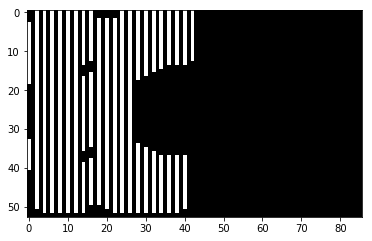

In [457]:
plt.imshow(cells, 'gray')

(915, 2)


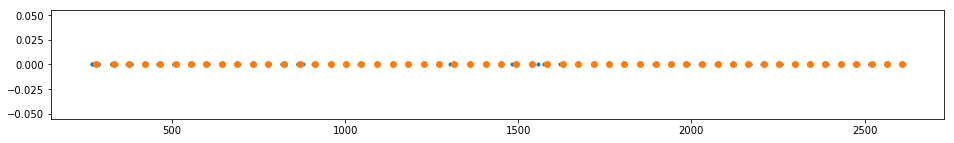

In [458]:
pts_proj_y = proj_pts(odd_columns, cal_paxis(delta_optimal_y))
pts_proj_y.shape
pts_projY = np.array([(pt, 0) for pt in pts_proj_y])
print(pts_projY.shape)

kmeans = KMeans(n_clusters=53, random_state=0).fit(pts_projY)

plt.figure(figsize=(16,2))
plt.plot(pts_proj_y, [0]*len(pts_proj_y), '.')
# plt.figure(figsize=(16,2))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'o');  plt.show()

In [459]:
odd_labels = kmeans.labels_
odd_labels.shape

(915,)

In [460]:
cts = kmeans.cluster_centers_[:, 0]
idx_map = np.argsort(cts)
odd_labels = [np.where(idx_map==i)[0][0] for i in odd_labels]

In [461]:
for row_label, col_label in zip(odd_labels, odd_col_labels):
    cells[row_label, col_label] = 1

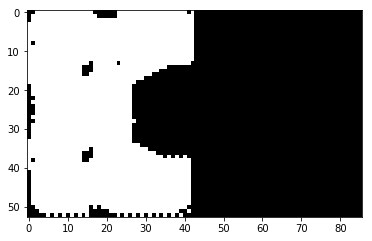

In [462]:
plt.imshow(cells, 'gray')

In [463]:
def get_hex(x, y, l=10):
    return np.array([[x+l, y],
                    [x+l/2, y-np.sqrt(3)/2*l],
                    [x-l/2, y-np.sqrt(3)/2*l],
                    [x-l, y],
                    [x-l/2, y+np.sqrt(3)/2*l],
                    [x+l/2, y+np.sqrt(3)/2*l]], np.int32)

In [464]:
patches = []
l = 50
for i in range(86):
    for j in range(53):
        
        if cells[j, i]:
            if i%2 == 0:
                
                pts = get_hex(l*i*1.5+200, l*(j+1)*np.sqrt(3)+200, l)
                
            #     pts = get_hex(0, 0, 20)
            else:
                pts = get_hex(l*i*1.5+200, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, l)

            polygon = Polygon(pts, True)
            patches.append(polygon)
        else:
            pass    

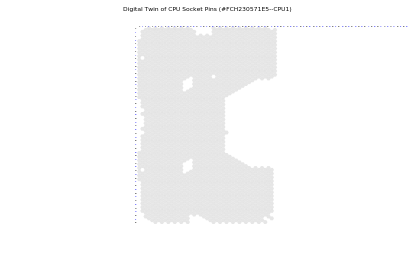

In [465]:
fig, ax = plt.subplots()
# fig.set_size_inches(8.5, 11)

# colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=1, linewidth=.01, edgecolor=[.5, .5, .5], facecolor=[.9, .9, .9])
# p.set_array(np.array(colors))
ax.add_collection(p)
# fig.colorbar(p, ax=ax)

# for i in range(42):
#     for j in range(53):        
#         plt.text(l*i*3+200, l*j*np.sqrt(3)+200, 's', fontsize=.5)
for i in range(84):
    if i%2:
        fcolor = 'blue'
    else:
        fcolor = 'black'
    plt.text(l*i*1.5+200, 175, str(i), fontsize=2, ha='center', va='center', color=fcolor)

for j in range(53):
    if j%2:
        fcolor = 'blue'
    else:
        fcolor = 'black'
    plt.text(120, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, str(j), fontsize=2, ha='center', va='center', color=fcolor)
        
# for i in range(42):
#     for j in range(52):        
#         pts = get_hex(l*i*3+200+l*1.5, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, l)

plt.autoscale()
plt.gca().invert_yaxis()
plt.title('Digital Twin of CPU Socket Pins (#FCH230571E5--CPU1)', fontsize=6)
plt.axis('equal')
plt.axis('off')
plt.savefig('dt.pdf')
plt.show()

## let's define some functions

In [476]:
def cluster_row_n_col_odd(columns, delta_optimal):
    
    odd_indices = np.arange(1, 43, 2)
    odd_columns = np.array(columns)[odd_indices]
    
    odd_col_labels = []
    for idx, col in zip(odd_indices, odd_columns):
        odd_col_labels.append([idx]*len(col)) 
        
    odd_col_labels = np.array([i for col in odd_col_labels for i in col])    
    
    odd_columns = np.concatenate(odd_columns, 0)

    delta_optimal_y = delta_optimal + 90
    pts_proj_y = proj_pts(odd_columns, cal_paxis(delta_optimal_y))
    pts_proj_y.shape
    pts_projY = np.array([(pt, 0) for pt in pts_proj_y])
#     print(pts_projY.shape)

    kmeans = KMeans(n_clusters=53, random_state=0).fit(pts_projY)
    
    odd_labels = kmeans.labels_
    cts = kmeans.cluster_centers_[:, 0]
    idx_map = np.argsort(cts)
    
    odd_row_labels = [np.where(idx_map==i)[0][0] for i in odd_labels]
    
    
    return odd_row_labels, odd_col_labels

In [480]:
def cluster_row_n_col(columns, indices, n_clusters, delta_optimal):
    
    odd_indices = indices #np.arange(1, 43, 2)
    odd_columns = np.array(columns)[odd_indices]
    
    odd_col_labels = []
    for idx, col in zip(odd_indices, odd_columns):
        odd_col_labels.append([idx]*len(col)) 
        
    odd_col_labels = np.array([i for col in odd_col_labels for i in col])    
    
    odd_columns = np.concatenate(odd_columns, 0)

    delta_optimal_y = delta_optimal + 90
    pts_proj_y = proj_pts(odd_columns, cal_paxis(delta_optimal_y))
    pts_proj_y.shape
    pts_projY = np.array([(pt, 0) for pt in pts_proj_y])
#     print(pts_projY.shape)

    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pts_projY)
    
    odd_labels = kmeans.labels_
    cts = kmeans.cluster_centers_[:, 0]
    idx_map = np.argsort(cts)
    
    odd_row_labels = [np.where(idx_map==i)[0][0] for i in odd_labels]
    
    
    return odd_row_labels, odd_col_labels

In [481]:
odd_row_labels, odd_col_labels = cluster_row_n_col(columns, np.arange(1, 43, 2), 53, delta_optimal)

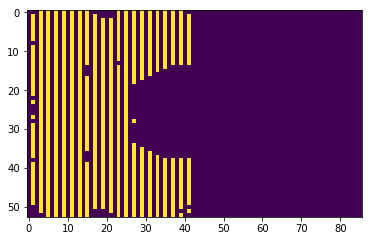

In [482]:
cells = np.zeros((53, 86))
for row_label, col_label in zip(odd_row_labels, odd_col_labels):
    cells[row_label, col_label] = 1
plt.imshow(cells)

In [483]:
even_row_labels, even_col_labels = cluster_row_n_col(columns, np.arange(0, 43, 2), 52, delta_optimal)

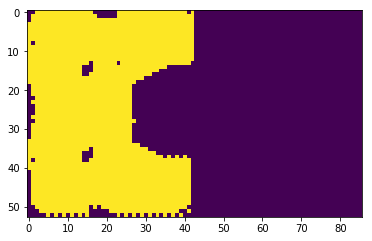

In [484]:
for row_label, col_label in zip(even_row_labels, even_col_labels):
    cells[row_label, col_label] = 1
plt.imshow(cells)

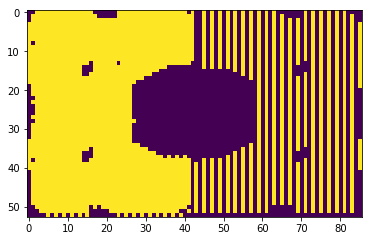

In [485]:
row_labels, col_labels  = cluster_row_n_col(columns, np.arange(43, 86, 2), 52, delta_optimal)

for row_label, col_label in zip(row_labels, col_labels):
    cells[row_label, col_label] = 1
plt.imshow(cells)

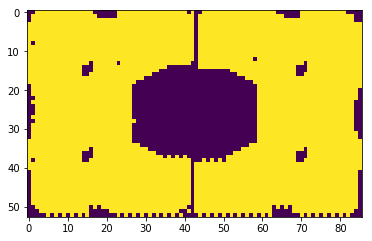

In [486]:
row_labels, col_labels  = cluster_row_n_col(columns, np.arange(44, 86, 2), 53, delta_optimal)

for row_label, col_label in zip(row_labels, col_labels):
    cells[row_label, col_label] = 1
plt.imshow(cells)

In [496]:
patches = []
l = 50
for i in range(43):
    for j in range(53):
        
        if cells[j, i]:
            if i%2 == 0:
                
                pts = get_hex(l*i*1.5+200, l*(j+1)*np.sqrt(3)+200, l)
                
            #     pts = get_hex(0, 0, 20)
            else:
                pts = get_hex(l*i*1.5+200, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, l)

            polygon = Polygon(pts, True)
            patches.append(polygon)
        else:
            pass 
        
for i in np.arange(43, 86):
    for j in range(53):
        
        if cells[j, i]:
            if i%2 == 0:
                
                pts = get_hex(l*i*1.5+200, l*(j)*np.sqrt(3)+200, l)
                
            #     pts = get_hex(0, 0, 20)
            else:
                pts = get_hex(l*i*1.5+200, l*(j)*np.sqrt(3)+200+l*np.sqrt(3)/2, l)

            polygon = Polygon(pts, True)
            patches.append(polygon)
        else:
            pass    

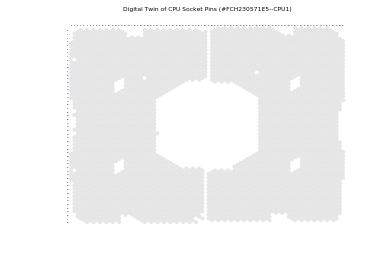

In [498]:
fig, ax = plt.subplots()
# fig.set_size_inches(8.5, 11)

# colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=1, linewidth=.01, edgecolor=[.5, .5, .5], facecolor=[.9, .9, .9])
# p.set_array(np.array(colors))
ax.add_collection(p)
# fig.colorbar(p, ax=ax)

# for i in range(42):
#     for j in range(53):        
#         plt.text(l*i*3+200, l*j*np.sqrt(3)+200, 's', fontsize=.5)
for i in range(86):
    if i%2:
        fcolor = 'blue'
    else:
        fcolor = 'black'
    plt.text(l*i*1.5+200, 125, str(i), fontsize=2, ha='center', va='center', color=fcolor)

for j in range(53):
    if j%2:
        fcolor = 'blue'
    else:
        fcolor = 'black'
    plt.text(120, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, str(j), fontsize=2, ha='center', va='center', color=fcolor)
        
# for i in range(42):
#     for j in range(52):        
#         pts = get_hex(l*i*3+200+l*1.5, l*j*np.sqrt(3)+200+l*np.sqrt(3)/2, l)

plt.autoscale()
plt.gca().invert_yaxis()
plt.title('Digital Twin of CPU Socket Pins (#FCH230571E5--CPU1)', fontsize=6)
plt.axis('equal')
plt.axis('off')
plt.savefig('dt.pdf')
plt.show()

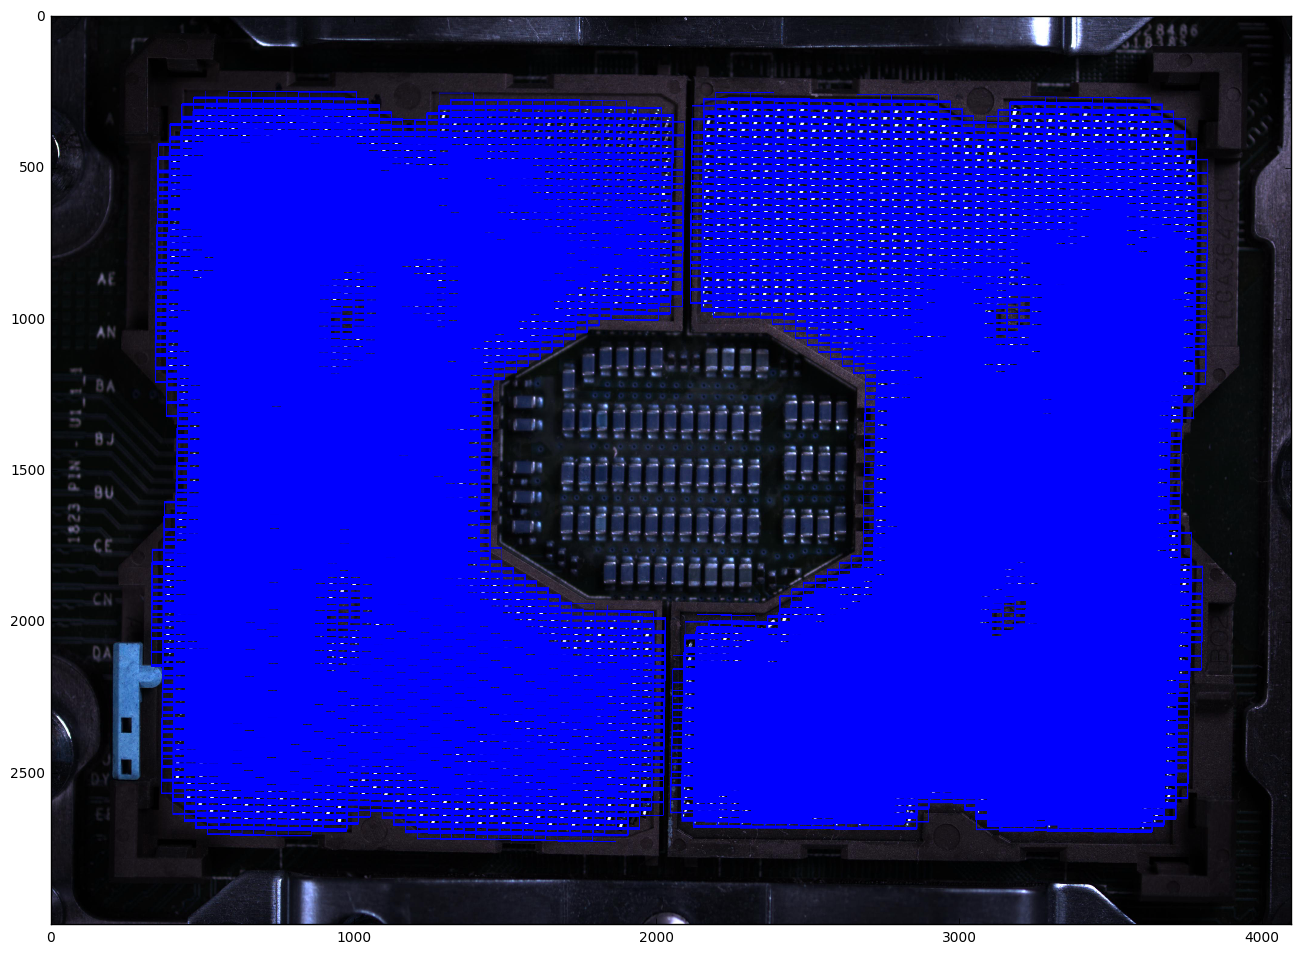

In [44]:
img_rgb = cv2.imread('./detect_pin/1.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./detect_pin/template_pins.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

# cv2.imwrite('res.jpg',img_rgb)

plt.figure(figsize=(16,16))
plt.imshow(img_rgb)

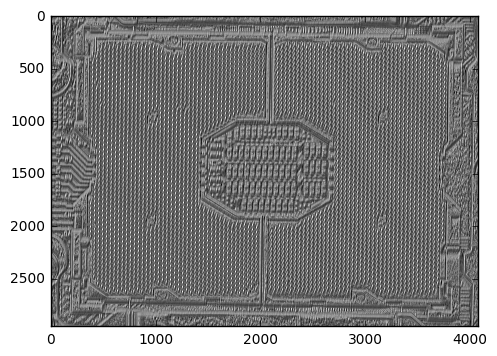

In [29]:
plt.imshow(res, 'gray')

In [57]:
import glob
img_list = glob.glob('./Data/Bent_pins_pictures/Pass/*.jpg')

In [69]:
template = cv2.imread('template_bolt.jpg',0)
template = gaussian_blur(template, kernel_size=5)

for i, img_file in enumerate(img_list[:]):
    img_rgb = cv2.imread(img_file)
    
#     h, w = img.shape[0:2]
    
#     img_rgb = cv2.imread('./Data/Bent_pins_pictures/Pass/\'FLM234408B6--PASS_CPU2\'.jpg')
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.375
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

    cv2.imwrite('./Data/Bent_pins_pictures/Pass_result_3bolt_1/'+str(i)+'.jpg',img_rgb)
        
#     cv2.line(img, (0, h//2), (w, h//2), (255,255,255), 5)
#     cv2.line(img, (w//2, 0), (w//2, h), (255,255,255), 5)
#     cv2.circle(img, (w//2, h//2), 40, (255,0,0), 5)
    
    
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     cv2.imwrite('./Data/Bent_pins_pictures/Pass_result/'+str(i)+'.jpg', img)